#Random Forest


Training Confusion Matrix:
[[ 0  0  4  0  0]
 [ 1  0  7  0  0]
 [ 2  1 25  4  1]
 [ 0  0  6  3  1]
 [ 0  0  2  0  2]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         8
           2       0.57      0.76      0.65        33
           3       0.43      0.30      0.35        10
           4       0.50      0.50      0.50         4

    accuracy                           0.51        59
   macro avg       0.30      0.31      0.30        59
weighted avg       0.42      0.51      0.46        59


Training Accuracy Score: 0.5084745762711864

ROC-AUC Score (Test Set): 0.9226133866133865

Test Set Confusion Matrix:
[[0 0 1 0 0]
 [0 2 1 0 0]
 [0 0 4 0 0]
 [0 0 3 2 0]
 [1 0 1 0 0]]

Test Set Accuracy: 0.5333333333333333


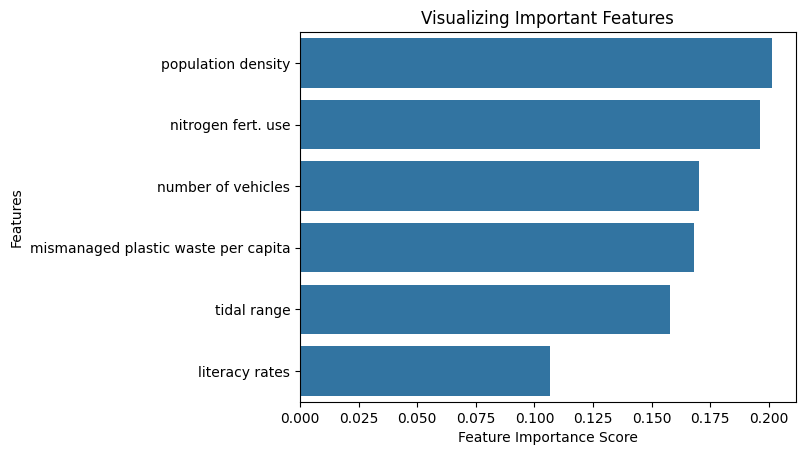

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#Loading the dataset using Pandas, and drop the unsused columns in the dataset
data = pd.read_excel('test (2).xlsx')
data["MP concentration"] = data["MP concentration"].str.strip()
data = data.drop(data.columns[[0, 1]], axis=1)

#Ordinally encoding our categorizations of our variables and then mapping them to a new column, GPT
category_mapping = {
    "very low": 0,
    "low": 1,
    "medium": 2,
    "high": 3,
    "very high": 4
}
data["MP_Concentration_Encoded"] = data["MP concentration"].map(category_mapping)

data['total_plastic_waste'] = data['mismanaged plastic waste per capita'] * data['population ']
data['runoff'] = data['average yearly precipitation*'] * data['city elevation difference (meters)']
#Trying to create different features to test out predcitions, using Pandas Documentation https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html

# Setting X and Y values
X = data[['population density', 'literacy rates',
       'nitrogen fert. use',
       'number of vehicles', 'mismanaged plastic waste per capita',
       'tidal range']] #Try different group of parameters to get most accurate value
y = data["MP_Concentration_Encoded"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LeaveOneOut for final evaluation - Professor
cv = LeaveOneOut()

# Perform Grid Search with reduced k-fold cross-validation for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid SearchCV with reduced k-fold, Find best hyper parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=KFold(n_splits=4), scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# LOOCV loop for final evaluation, https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/
y_pred = []
y_true = []
for train_ix, test_ix in cv.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_ix], X_train.iloc[test_ix]
    y_train_fold, y_val_fold = y_train.iloc[train_ix], y_train.iloc[test_ix]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    y_pred.extend(y_pred_fold)
    y_true.extend(y_val_fold)

# Evaluate the model using LOOCV on training data, https://gist.github.com/pb111/88545fa33780928694388779af23bf58
print("Training Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nTraining Classification Report:")
print(classification_report(y_true, y_pred, zero_division=0))
print("\nTraining Accuracy Score:", accuracy_score(y_true, y_pred))

# ROC-AUC Calculation on the test set, https://semaphoreci.com/blog/imbalanced-data-machine-learning-python and Gemini
y_probs_test = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs_test, multi_class='ovr')
print(f"\nROC-AUC Score (Test Set): {roc_auc}")


# Print the confusion matrix
y_pred_test = best_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print("\nTest Set Confusion Matrix:")
print(cm_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the test set accuracy
print("\nTest Set Accuracy:", accuracy_test)

# Feature Importance
feature_scores = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph

plt.show()
#https://gist.github.com/pb111/88545fa33780928694388779af23bf58 - all evaluation metrics except ROC-AUC

#SVM


In [ ]:
data.columns

Index(['population ', 'city area', 'population density', 'literacy rates',
       'nitrogen fert. use', 'average yearly precipitation*',
       'number of vehicles', 'mismanaged plastic waste per capita',
       'tidal range', 'city elevation difference (meters)', 'Latitude',
       'Longitude', 'cars per cap', 'MP concentration'],
      dtype='object')

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

        high       0.80      0.80      0.80         5
         low       0.67      0.67      0.67         3
      medium       0.50      0.75      0.60         4
   very high       1.00      0.50      0.67         2
    very low       0.00      0.00      0.00         1

    accuracy                           0.67        15
   macro avg       0.59      0.54      0.55        15
weighted avg       0.67      0.67      0.65        15


Confusion Matrix:
 [[4 1 0 0 0]
 [0 2 1 0 0]
 [1 0 3 0 0]
 [0 0 1 1 0]
 [0 0 1 0 0]]
SVC(C=10, class_weight='balanced', kernel='linear')
Training set score: 0.7458
Test set score: 0.6667
MCC: 0.5562342005550127

Feature Importances (Permutation Importance):
Feature population : 0.17999999999999997
Feature city area: 0.059999999999999984
Feature population density: 0.2333333333333333


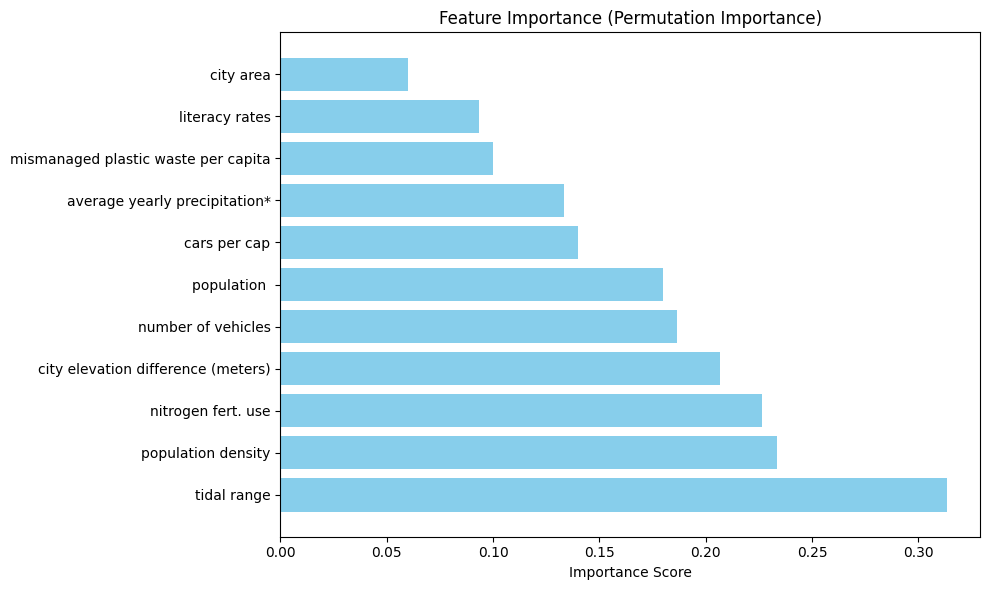

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.inspection import permutation_importance

# Loading the data
data = pd.read_excel('test (2).xlsx')
data = data.drop(data.columns[[0, 1]], axis=1)  # Remove first two columns
data["MP concentration"] = data["MP concentration"].str.strip()  # Stripping unnecessary spaces
X = data.iloc[:, :-1]  # Features
y = data["MP concentration"]  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using only training data,  https://gist.github.com/pb111/ca4680d8960c46aeb1b824a93a079fa7
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Train and tune the model
model = SVC(class_weight='balanced')
grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(best_model)
print('Training set score: {:.4f}'.format(best_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_model.score(X_test, y_test)))


# Matthews Correlation Coefficient and permutation importance, Gemini
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X.columns

print("\nFeature Importances (Permutation Importance):")
for i, importance in enumerate(importances):
    print(f"Feature {feature_names[i]}: {importance}")
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create plot
plt.figure(figsize=(10, 6))  # Adjusted figure size
plt.title("Feature Importance (Permutation Importance)")
plt.barh(range(X.shape[1]), importances[indices], align="center", color="skyblue")
plt.yticks(range(X.shape[1]), feature_names[indices])  # Removed rotation
plt.ylim([-1, X.shape[1]])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#Boosting


Confusion Matrix:
 [[ 0  0  4  0  0]
 [ 1  0  7  0  0]
 [ 2  1 25  4  1]
 [ 0  0  6  3  1]
 [ 0  0  2  0  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         8
           2       0.57      0.76      0.65        33
           3       0.43      0.30      0.35        10
           4       0.50      0.50      0.50         4

    accuracy                           0.51        59
   macro avg       0.30      0.31      0.30        59
weighted avg       0.42      0.51      0.46        59


Accuracy: 0.5084745762711864


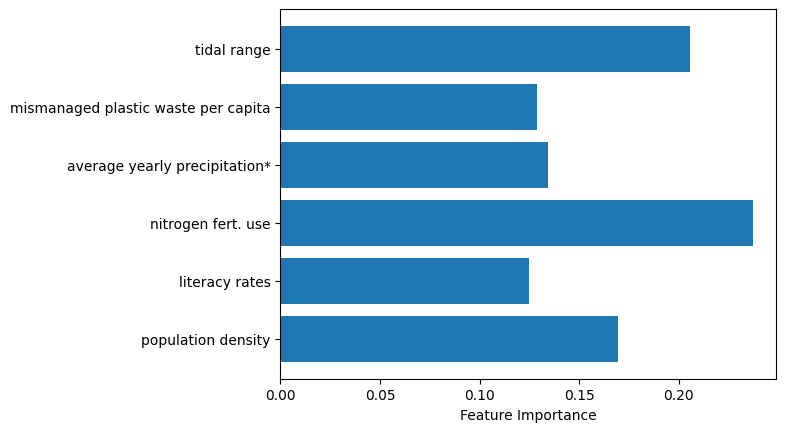

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the data and edit columns
data = pd.read_excel('/content/test (2).xlsx')
data["MP concentration"] = data["MP concentration"].str.strip()
data = data.drop(data.columns[[0, 1]], axis=1)
# Ordinally encode target variable
category_mapping = {
    "very low": 0,
    "low": 1,
    "medium": 2,
    "high": 3,
    "very high": 4
}
data["MP_Concentration_Encoded"] = data["MP concentration"].map(category_mapping)

#Initialize x parameters and y parameters
X = data[['population density', 'literacy rates',
          'nitrogen fert. use', 'average yearly precipitation*',
          'mismanaged plastic waste per capita', 'tidal range']]
y = data["MP_Concentration_Encoded"]

# Initialize LeaveOneOut cross-validation
cv = LeaveOneOut()

# Lists to store predictions and true labels for all folds
y_true = []
y_pred = []

# Define the XGBoost classifier, Gemini
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='mlogloss',
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=42,
    verbosity=1
)

# Perform LOOCV, https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/
for train_ix, test_ix in cv.split(X):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix] # Changed to use .iloc for indexing
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Train the model on the training data
    xgb_model.fit(X_train, y_train)
    # Make predictions on the test data
    yhat = xgb_model.predict(X_test)
    # Store predictions and true labels
    y_true.extend(y_test)
    y_pred.extend(yhat)


# Evaluate the model using predictions and true labels from all folds
print("\nConfusion Matrix:\n", confusion_matrix(all_y_true, all_y_pred))
print("\nClassification Report:\n", classification_report(all_y_true, all_y_pred, zero_division=0))
print("\nAccuracy:", accuracy_score(all_y_true, all_y_pred))


# Feature Importance
plt.barh(X.columns, xgb_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.show()
